# Mushroom Classification

### Predict whether a mushroom is safe to eat and is poison

Context

Although this dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. Learn which features spell certain death and which are most palatable in this dataset of mushroom characteristics. And how certain can your model be?

Content

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

Time period: Donated to UCI ML 27 April 1987

Inspiration

What types of machine learning models perform best on this dataset?

Which features are most indicative of a poisonous mushroom?

Acknowledgements

This dataset was originally donated to the UCI Machine Learning repository. You can learn more about past research using the data here.

####  Import modules for EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Import Dataset

In [2]:
dat = pd.read_csv("mushrooms.csv", header = 0)
dat.shape

(8124, 23)

In [3]:
dat.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


- Column definition can be found in the bottom of the document

- All categorical data?
  - Each category can be converted to 1 or 0 


##### Any Missing Data?  -- No. It's clean

In [4]:
dat.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

##### Data Visualization 

##### Uni-variate EDA

In [5]:
cols = dat.columns # Retrieve column names 

/home/jpeunix/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


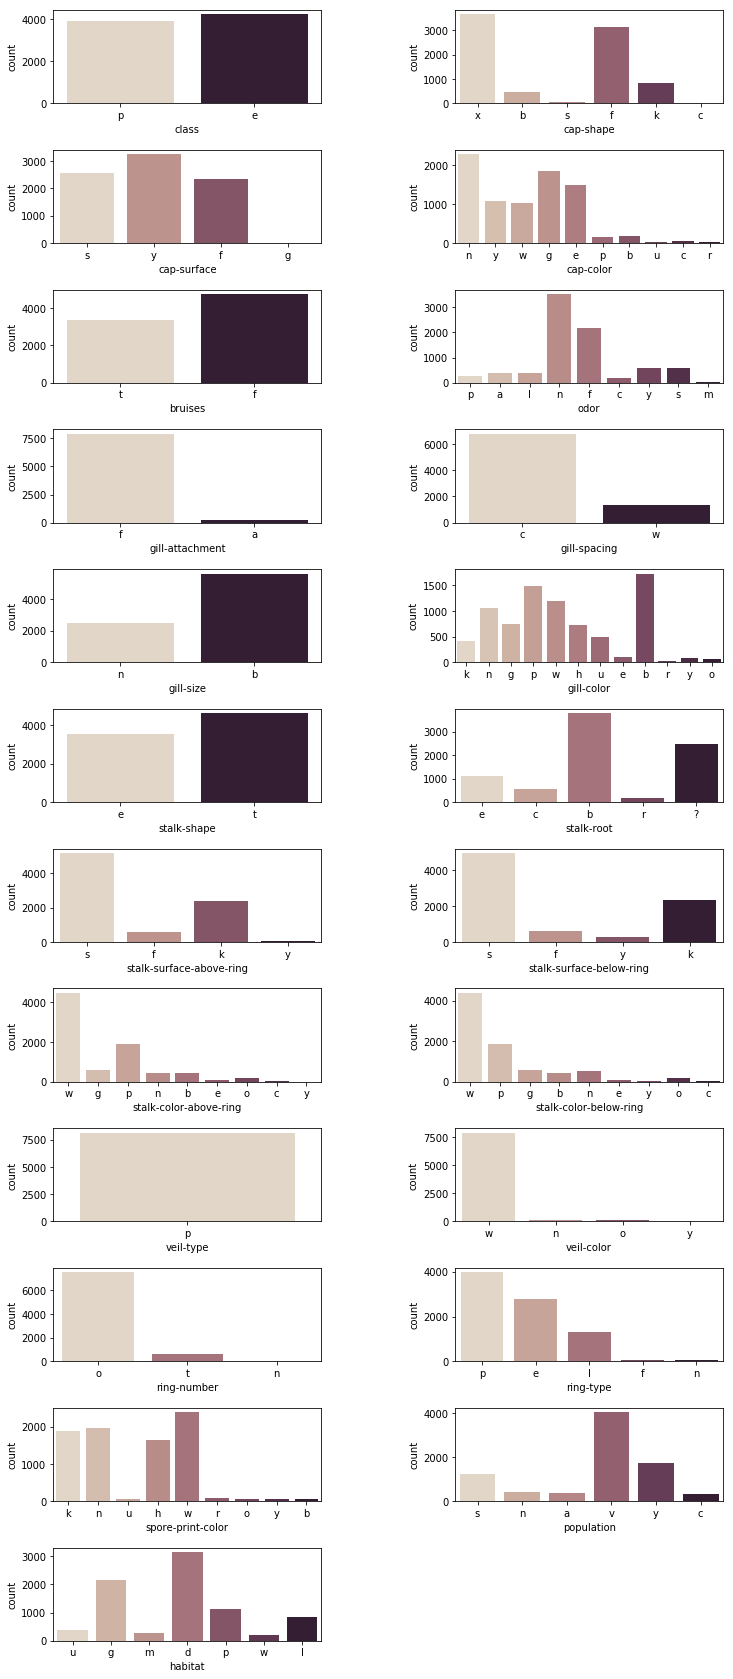

In [6]:
# Plot
fig = plt.figure(figsize=(12,30))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(23):
    ax = fig.add_subplot(12, 2, (i+1))
    sns.catplot(x= cols[i], kind="count", palette="ch:.25", data=dat, ax= ax, height = 6, aspect = 3)
    ax.set_xticklabels(ax.get_xticklabels())

for j in range(2,25):
    plt.close(j)
    
plt.show()

#### First impression

- The dataset is balanced. number of poison mushroom is roughly equals to number that is safe to eat
- Gill-attachment, gill-space, veil-type, veil color, ring number are probably not important 
  - Confirm with the feature importance if necessary
- Drop veil type 

##### Encoding the data set

In [7]:
# Cleaning all columns that is binary 

dat['label'] = np.where(dat['class'].str.contains("e"), 1, 0)            # edible = 1
dat = dat.drop(columns=['class', 'veil-type'])
dat['bruises'] = np.where(dat['bruises'].str.contains("t"), 1, 0)        
dat['gill-size'] = np.where(dat['gill-size'].str.contains("b"), 1, 0)
dat['stalk-shape'] = np.where(dat['stalk-shape'].str.contains("e"), 1, 0)

In [8]:
# Change number 
cleanup_nums = {"ring-number": {"n": 0, "o": 1, "t": 2}}
dat.replace(cleanup_nums, inplace=True)

In [9]:
# Covert other object columns 
obj_cols = dat.select_dtypes([object]).columns # Get a list of object columns that need to be converted 
dat = pd.get_dummies(dat, obj_cols)
dat = dat.reindex(sorted(dat.columns), axis=1) #  Reset columns order 

In [10]:
dat.head()

,bruises,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,...,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y
0,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


###### Multi-variate EDA

#### Correlations

In [11]:
# calculate correlation 
corr = dat.corr()

[Text(0.5, 0, 'bruises'),
 Text(5.5, 0, 'cap-color_n'),
 Text(10.5, 0, 'cap-color_y'),
 Text(15.5, 0, 'cap-shape_s'),
 Text(20.5, 0, 'cap-surface_y'),
 Text(25.5, 0, 'gill-color_g'),
 Text(30.5, 0, 'gill-color_p'),
 Text(35.5, 0, 'gill-size'),
 Text(40.5, 0, 'habitat_l'),
 Text(45.5, 0, 'label'),
 Text(50.5, 0, 'odor_m'),
 Text(55.5, 0, 'population_a'),
 Text(60.5, 0, 'population_y'),
 Text(65.5, 0, 'ring-type_n'),
 Text(70.5, 0, 'spore-print-color_n'),
 Text(75.5, 0, 'spore-print-color_y'),
 Text(80.5, 0, 'stalk-color-above-ring_n'),
 Text(85.5, 0, 'stalk-color-below-ring_b'),
 Text(90.5, 0, 'stalk-color-below-ring_o'),
 Text(95.5, 0, 'stalk-root_b'),
 Text(100.5, 0, 'stalk-surface-above-ring_f'),
 Text(105.5, 0, 'stalk-surface-below-ring_k'),
 Text(110.5, 0, 'veil-color_w')]

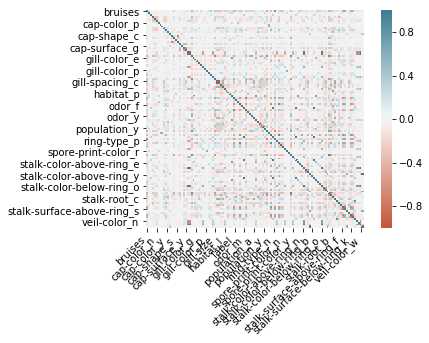

In [12]:
# Plotting the heat map
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

- Difficult to visualize all variables
- See the correlations between label and features

In [13]:
# Print 
labelCorr = pd.DataFrame(corr['label']).sort_values(by='label')
labelCorr

,label
odor_f,-0.623842
stalk-surface-above-ring_k,-0.587658
stalk-surface-below-ring_k,-0.573524
gill-color_b,-0.538808
spore-print-color_h,-0.490229
ring-type_l,-0.451619
population_v,-0.443722
spore-print-color_w,-0.357384
gill-spacing_c,-0.348387
habitat_p,-0.323346


Text(0.5, 1.0, 'Histogram of Corelations between variables and label')

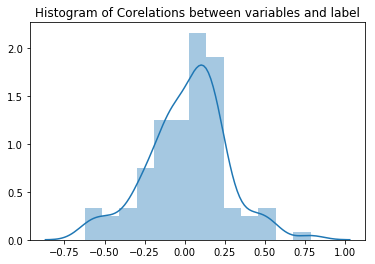

In [14]:
# Distribution plot 
sns.distplot(labelCorr[:-1]).set_title('Histogram of Corelations between variables and label')

- The distribution looks normal and reasonable 
- Not all variables have predictibilty. Will check with feature importance. 
- Feed all variable in the model and tune the model based on feature importance? 

#### Write clean data for model training 

- Classification problem with two classes
- Model candidates:
  - Logistic Regression (with Cross Validation)
  - Random Forest Classifier 
  - LDA, QDA
  - ......

In [15]:
dat.to_csv('mushroom_clean_v1.csv', index=False)

#### Appendix: Feature definition 

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d